In [2]:
import sys
import logging
import matplotlib.pyplot as plt
import cstrees.cstree as ct
import cstrees.scoring as sc
import networkx as nx
import numpy as np
%load_ext autoreload
%autoreload 2
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)


      a  b  c
0     2  2  2
1     1  1  1
2     0  0  1
3     1  1  0
4     0  1  0
...  .. .. ..
1996  1  1  0
1997  0  1  1
1998  1  1  1
1999  1  1  0
2000  1  1  0

[2001 rows x 3 columns]


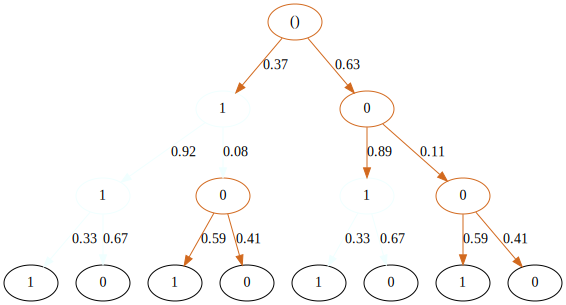

In [10]:
np.random.seed(5)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

# V-structure
# tree.set_stages({
#    -1: [ct.Stage([])],
#   0: [ct.Stage([{0, 1}])],
#   1: [ct.Stage([0,0]), ct.Stage([0,1]), ct.Stage([1,0]), ct.Stage([1,1])]})

# Fork
tree.update_stages({
    0: [ct.Stage([0]), ct.Stage([1])],
    1: [ct.Stage([{0, 1}, 0]), ct.Stage([{0, 1}, 1])]})

tree.set_random_stage_parameters(alpha=1.0)

a = tree.plot()

# a.draw("testplot.png")
x = tree.sample(2000)
print(x)

true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
a


In [5]:

order = ["a", "b", "c"]
# Should order be expressed as the labels or as the levels?
# labels seems more natural but may include strings then which is a bit ugly.
s1 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s1)


-3266.7673757353805


In [6]:
#order = [0, 2, 1]
order = ["a", "c", "b"]
s2 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s2)


-3268.9944009209453


order: ['a', 'b', 'c'], score: -3266.7673757353805
order: ['a', 'c', 'b'], score: -3268.9944009209453
order: ['b', 'a', 'c'], score: -3266.7673757353796
order: ['b', 'c', 'a'], score: -3266.7673757353796
order: ['c', 'a', 'b'], score: -3268.9944009209453
order: ['c', 'b', 'a'], score: -3266.7673757353805
optimal order: ['b', 'a', 'c'], score -3266.7673757353796
max staging: ['[]']
max staging: ['[0]', '[1]']
max staging: ['[0, {0, 1}]', '[1, {0, 1}]']
stages :{0: [<cstrees.stage.Stage object at 0x7fac4ae13880>, <cstrees.stage.Stage object at 0x7fac4adf6cd0>], 1: [<cstrees.stage.Stage object at 0x7fac4ae13ee0>, <cstrees.stage.Stage object at 0x7fac4adf66a0>], 2: [], -1: [<cstrees.stage.Stage object at 0x7fac47536df0>]}


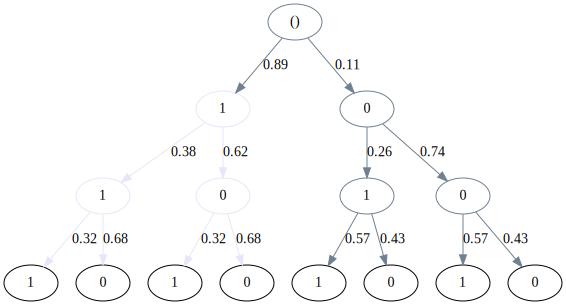

In [7]:
optord, score = ct.find_optimal_order(
    x, strategy="max", max_cvars=1, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ct.optimal_cstree(optord, x, max_cvars=1,
                            alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.plot()


In [14]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_opt.png",
                args='-Glabel="'+str(key)+'"   ')
